# Лабораторная работа №7. Рябиков Илья

1. Find some source of data where you can it's stored in JSON or XML form. Maybe it's an API. 
2. Retrieve some data from the source 
3. Perform some analysis based on your experience and knowledge


## 1. Импорт библиотек и данных

In [11]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [13]:
import requests
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
url = "https://api.covid19api.com/dayone/country/czech-republic"
r = requests.get(url)
g = r.json()
url = "https://api.covid19api.com/dayone/country/sweden"
r = requests.get(url)
s = r.json()

In [3]:
ch = pd.DataFrame(g)
sw = pd.DataFrame(s)

Достанем данные по заболеваниям COVID-19 с помощью API и JSON. Известно, что Швеция изначально отказалась от каких-либо мер по борьбе с инфекцией. Посмотрим на статистику заболеваний в Швеции (без каких либо мер) и Чехии (были очень сильные меры)

## 2. Анализ полученных данных

Вначале обработаем данные - создадим переменные case и case_death, которые будут обозначать прирост переменных Confirmed и Death, поскольку они накопительные, а нам важно посмотреть также приросты

In [4]:
ch['case'] = ch['Confirmed']-ch['Confirmed'].shift(1)
ch['case_death'] = ch['Deaths']-ch['Deaths'].shift(1)
sw['case'] = sw['Confirmed']-sw['Confirmed'].shift(1)
sw['case_death'] = sw['Deaths']-sw['Deaths'].shift(1)

Также переведем даты в корректный формат

In [5]:
ch['Date'] = pd.to_datetime(ch['Date'])
sw['Date'] = pd.to_datetime(sw['Date'])

Поскольку данные по выходным часто могут быть некорректными или отсутствовать, посмотрим на дни недели и оставим только пн-пт

In [6]:
ch['weekday'] = ch['Date'].apply(lambda x: datetime.weekday(x))
sw['weekday'] = sw['Date'].apply(lambda x: datetime.weekday(x))

In [7]:
df_ch = ch[ch['weekday']<5][['Date', 'case']]
df_sw = sw[sw['weekday']<5][['Date', 'case']]

Построим график случаев для обеих стран

Чехия

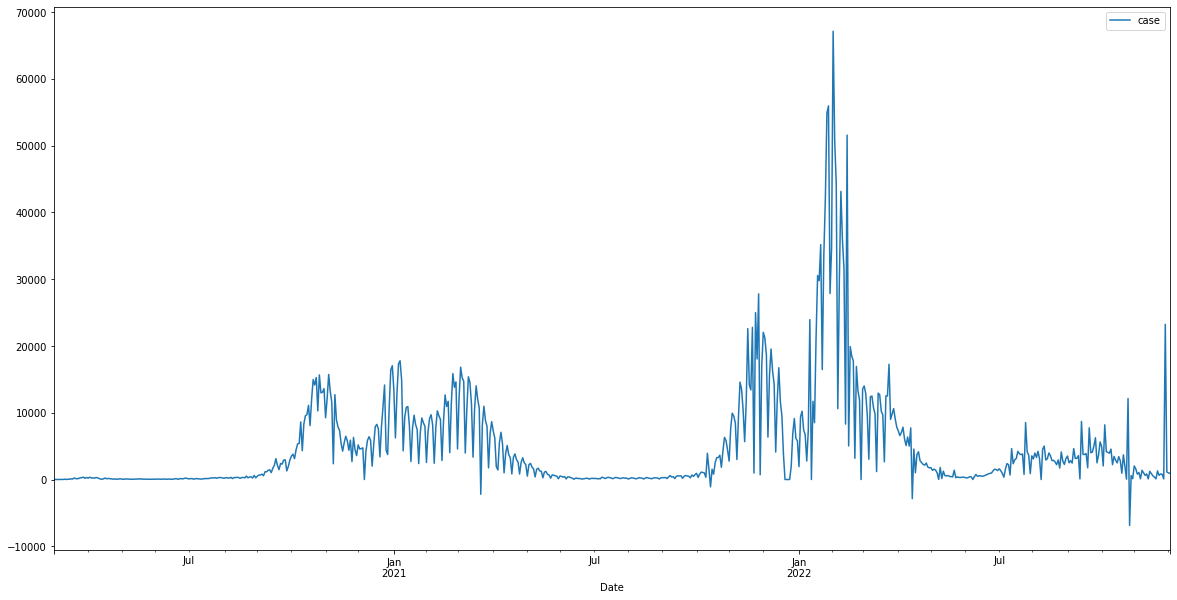

In [ ]:
df_ch.plot(x='Date', y='case', figsize=(20,10))

Швеция

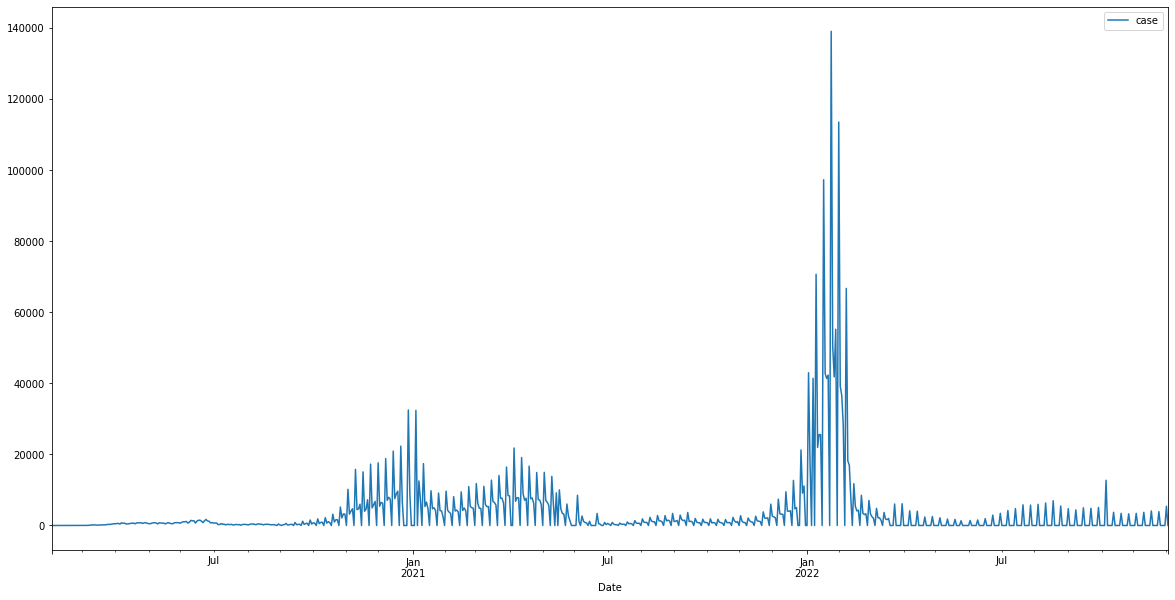

In [ ]:
df_sw.plot(x='Date', y='case', figsize=(20,10))

Можем заметить, что в Швеции во время волны декабря-января 2022 года есть только один пик - после рождественских праздников, тогда как в Чехии рост числа выявленных случаев произошел еще в конце осени, потом заболеваемость снизилась - возможно начали работать меры, но потом снова пошел резкий рост заболеваний, параллельный Швеции. Получается в Чехии волна оказалась гораздо более растянутой, в результате чего несмотря на то, что пик в Чехии был в два раза ниже, урон, нанесенный экономике вначале от мер ограничения, а затем от продолжительной волны больничных и неработающих людей мог быть выше.

А также построим график накопленного числа случаев

Чехии

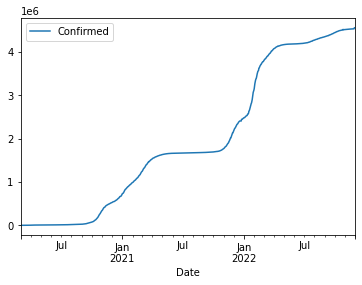

In [ ]:
ch.plot(x='Date', y='Confirmed')

Швеции

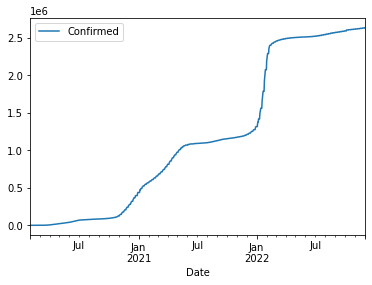

In [ ]:
sw.plot(x='Date', y='Confirmed')

В целом - графики очень похожи, за исключением того факта, что в Чехии суммарным накопленным итогом получилось в полтора раза больше заболевших, хотя пиковые значения у Швеции примерно в 2 раза выше.

Также посмотрим на средние по дням недели - возможно в Швеции не так активно выявляли случаи?

Чехия

In [ ]:
ch[['case', 'case_death', 'weekday']].groupby('weekday').mean()

,case,case_death
weekday,,
0,2458.423611,36.680556
1,4919.347222,49.631944
2,6177.097222,45.201389
3,5337.263889,43.152778
4,5164.277778,43.958333
5,4665.426573,41.944056
6,2998.790210,30.888112


Швеция

In [ ]:
sw[['case', 'case_death', 'weekday']].groupby('weekday').mean()

,case,case_death
weekday,,
0,69.993243,3.493243
1,7890.837838,24.635135
2,3021.141892,46.905405
3,3873.175676,41.804054
4,2826.128378,23.324324
5,65.020408,1.530612
6,38.533784,1.067568


Заметим, что в Чехии данные достаточно равномерные - даже в выходные выявляется довольно ощутимое количество людей, а смертность практически не зависит от дня недели

Далее, для того, чтобы проанализировать влияние всех волн пандемии, ограничений, смертей и болезней на фондовый рынок, посмотрим на индексы Швеции и Чехии и как они вели себя в период пиковых нагрузок со стороны коронавируса.

Чехия

In [21]:
today = date.today()

ch_st = yf.download('^NQCZCZK','2020-01-01', today)
ch_st['log_rtn'] = np.log(ch_st['Adj Close']) - np.log(ch_st['Adj Close'].shift(1))

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^NQCZCZK: No data found for this date range, symbol may be delisted


In [20]:
ch_st

,Open,High,Low,Close,Adj Close,Volume,log_rtn
Date,,,,,,,


Швеция

In [16]:
today = date.today()

sw_st = yf.download('EWD','2020-01-01', today)
sw_st['log_rtn'] = np.log(sw_st['Adj Close']) - np.log(sw_st['Adj Close'].shift(1))

[*********************100%***********************]  1 of 1 completed


In [15]:
df_sw.plot(x='Date', y='case', figsize=(20,10))

,Open,High,Low,Close,Adj Close,Volume,log_rtn
Date,,,,,,,
2020-01-02,33.669998,33.820000,33.590000,33.820000,30.847139,666300,NaN
2020-01-03,33.090000,33.200001,32.919998,32.919998,30.026251,430200,-0.026972
2020-01-06,32.770000,32.939999,32.709999,32.900002,30.008015,364900,-0.000608
2020-01-07,32.919998,33.110001,32.919998,32.939999,30.044495,277000,0.001215
2020-01-08,32.950001,33.320000,32.950001,33.150002,30.236036,337100,0.006355
...,...,...,...,...,...,...,...
2022-12-06,34.090000,34.119999,33.490002,33.619999,33.619999,394300,-0.011239
2022-12-07,33.560001,33.720001,33.310001,33.470001,33.470001,422300,-0.004472
2022-12-08,33.419998,33.700001,33.310001,33.689999,33.689999,1166300,0.006551


Поскольку по индексам тяжело найти данные и они не слишком вызывают доверие, посмотрим на динамику компаний из одного сектора - например банки, которые обычно чутко реагируют на изменения в экономике. В Швеции возьмем SEB, а в Чехии - банк MONETA. Они точно национальные и по ним самый большой оборот

In [22]:
today = date.today()

sw_st = yf.download('SEB-A.ST','2020-01-01', today)
sw_st['log_rtn'] = np.log(sw_st['Adj Close']) - np.log(sw_st['Adj Close'].shift(1))

[*********************100%***********************]  1 of 1 completed


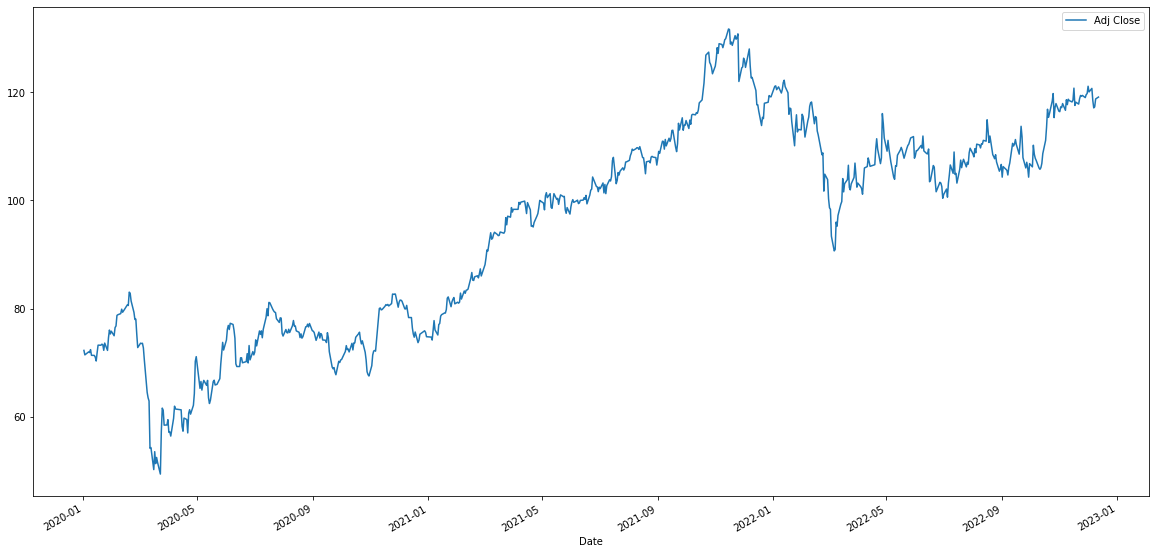

In [28]:
sw_st.reset_index().plot(x='Date', y='Adj Close', figsize=(20,10))

In [24]:
today = date.today()

ch_st = yf.download('MONET.PR','2020-01-01', today)
ch_st['log_rtn'] = np.log(ch_st['Adj Close']) - np.log(ch_st['Adj Close'].shift(1))

[*********************100%***********************]  1 of 1 completed


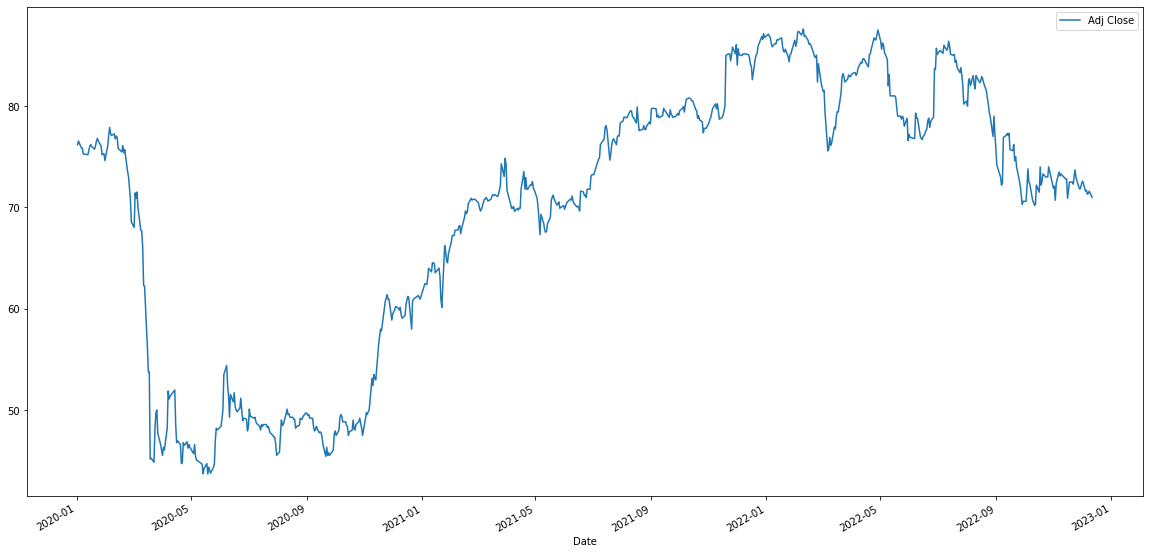

In [29]:
ch_st.reset_index().plot(x='Date', y='Adj Close', figsize=(20,10))

В целом, ситуация с пиковыми заболеваниями не повлияла на акции этих банков, и гораздо яснее прослеживается резкое падение в феврале-марте 2022 года, когда уже не коронавирус, а геополитическая ситуация стала основным топиком в мире. В период пиков в акциях банков не прослеживалось негатива, но акции чешского банка гораздо сильнее упали в самом начале пандемии, когда не было известно ничего. И в целом, начав с примерно одинаковых значений, акции шведского банка показали себя гораздо устойчивее, что может тоже свидетельствовать о пользе для экономики отсутствия ограничительных мер.

## Вывод

Таким образом, были изучены данные по коронавирусу в двух странах - Швеции и Чехии. В Швеции люди почти свободно жили всю пандемию, в Чехии же правительство активно пыталось бороться с инфекцией. Данные были получены из JSON с помощью API.

В результате, в Швеции пиковые нагрузки были гораздо выше Чешских, но накопленный итог выше в Чехии - там волны заболеваний продолжались немного дольше. Но также причиной таких показателей может быть методика сбора статистики - в Швеции явно проседают данные по смертности и активным случаям с пятницы по воскресенье, тогда как в Чехии средние показатели гораздо стабильнее. 

Если посмотреть на стоимость акций обычного Шведского и обычного Чешского банков, то первому повезло гораздо больше - после пандемии цена его акций выросла, тогда как у второго в результате оказалась примерно на таком же уровне. 

Возможно, подход Швеции и правда помог экономике, ведь преодолев пик заболеваний, Шведы дальше шли работать и приносить экономике пользу, но методика сбора данных по странам отличается, что видно на цифрах, из-за чего однозначный ответ дать нельзя.
